In [7]:
# L δP = δRtoa - δRsfc - δH (O'Gorman version => fluxes positive upward)
import numpy as np
import xarray as xr
import esmlab
from pathlib import Path
import matplotlib.pyplot as plt



In [2]:
dloc = Path("/Volumes/Jedha/CMIP6")

In [3]:
# rlus_Amon_IPSL-CM6A-LR_amip_r1i1p1f1_gr_201501-201712.nc
def cmip_loader(loc, v, t, m, c, r):
    g = "_".join([v, t, m, c, r, "*.nc"])
    fils = sorted(list(loc.glob(g)))
    if len(fils) == 0:
        print(f"No files found: {g}")
        return None
    elif len(fils) == 1:
        return xr.open_dataset(fils[0])[v]
    else:
        return xr.open_mfdataset(fils)[v]
        

In [54]:
# get one variable, global average, and put into dictionary
def get_glbavg(VAR):
    X = {}
    shortnames = {"CESM2":"cesm", "CNRM-CM6-1":"cnrm", "HadGEM3-GC31-LL":"hadgem", "IPSL-CM6A-LR":"ipsl",  "MRI-ESM2-0":"mri",
                 "amip":"amip", "amip-lwoff":"amip-off", "aqua-control":"aqua", "aqua-control-lwoff":"aqua-off"}
    for M in ["CESM2", "CNRM-CM6-1", "HadGEM3-GC31-LL", "IPSL-CM6A-LR",  "MRI-ESM2-0" ]:
        for EX in ["amip", "amip-lwoff", "aqua-control", "aqua-control-lwoff"]:
                if MODEL == "CNRM-CM6-1":
                    REALIZATION = "r1i1p1f2"
                elif M == "HadGEM3-GC31-LL":
                    if EX == "amip":
                        REALIZATION = "r1i1p1f3"
                    elif EX == "amip-lwoff":
                        REALIZATION = "r5i1p1f2"
                    elif 'aqua' in EX:
                        REALIZATION = "r1i1p1f3"
                else:
                    REALIZATION = "r1i1p1f1"
                fullfield = cmip_loader(dloc, VAR, "Amon", M, EX, REALIZATION)
                if fullfield is not None:
                    w = np.cos(np.radians(fullfield['lat']))
                    globalmean = esmlab.weighted_mean(fullfield.mean(dim=('lon','time')), dim=['lat'], weights=w).values.item()
                    k = shortnames[M]+"-"+shortnames[EX]
                    X[k] = globalmean
    return X

In [36]:
rlut = get_glbavg("rlut")
rlutcs = get_glbavg("rlutcs")

lwcre = {}
for i in rlut:
    if i in rlutcs:
        lwcre[i] = rlutcs[i] - rlut[i]

/Users/brianpm/miniconda3/lib/python3.7/site-packages/xarray/conventions.py:498: SerializationWarning: variable 'rlut' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,


No files found: rlut_Amon_MRI-ESM2-0_aqua-control_r1i1p1f1_*.nc
No files found: rlut_Amon_MRI-ESM2-0_aqua-control-lwoff_r1i1p1f1_*.nc


/Users/brianpm/miniconda3/lib/python3.7/site-packages/xarray/conventions.py:498: SerializationWarning: variable 'rlutcs' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,


No files found: rlutcs_Amon_MRI-ESM2-0_aqua-control_r1i1p1f1_*.nc
No files found: rlutcs_Amon_MRI-ESM2-0_aqua-control-lwoff_r1i1p1f1_*.nc


In [40]:
rlds = get_glbavg("rlds")
rldscs = get_glbavg("rldscs")

lwcre_sfc = {}
for i in rlds:
    if i in rldscs:
        lwcre_sfc[i] = rldscs[i] - rlds[i]

/Users/brianpm/miniconda3/lib/python3.7/site-packages/xarray/conventions.py:498: SerializationWarning: variable 'rlds' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,


No files found: rlds_Amon_MRI-ESM2-0_aqua-control_r1i1p1f1_*.nc
No files found: rlds_Amon_MRI-ESM2-0_aqua-control-lwoff_r1i1p1f1_*.nc


/Users/brianpm/miniconda3/lib/python3.7/site-packages/xarray/conventions.py:498: SerializationWarning: variable 'rldscs' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,


No files found: rldscs_Amon_MRI-ESM2-0_aqua-control_r1i1p1f1_*.nc
No files found: rldscs_Amon_MRI-ESM2-0_aqua-control-lwoff_r1i1p1f1_*.nc


In [41]:
lwcre_sfc

{'cesm-amip': -27.466924652403804,
 'cesm-amip-off': -22.797060945353394,
 'cesm-aqua': -40.24013889325323,
 'cesm-aqua-off': -35.21459054792166,
 'cnrm-amip': -25.148659947460658,
 'cnrm-amip-off': 0.0,
 'cnrm-aqua': -31.480549057314988,
 'cnrm-aqua-off': 0.0,
 'hadgem-amip': -25.996770555103183,
 'hadgem-amip-off': 0.0,
 'hadgem-aqua': -33.61595103938225,
 'hadgem-aqua-off': 0.0,
 'ipsl-amip': -29.469329833984375,
 'ipsl-amip-off': 0.0,
 'ipsl-aqua': -43.71173095703125,
 'ipsl-aqua-off': 0.0,
 'mri-amip': -27.455639596185165,
 'mri-amip-off': -23.948713445837143}

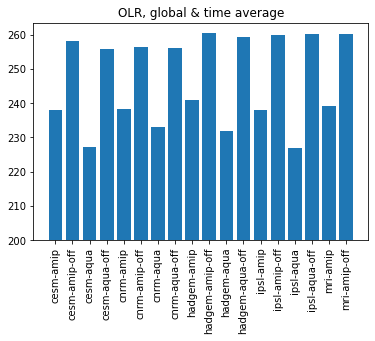

In [67]:
# visualize the δOLR
# use rlut for control, but rlutcs for lwoff
olr_correct = {}
for i in rlut:
    if 'off' in i:
        olr_correct[i] = rlutcs[i]
    else:
        olr_correct[i] = rlut[i]
fig, ax = plt.subplots()
bot=200
ax.bar(np.arange(len(olr_correct)), np.array(list(olr_correct.values()))-bot, bottom=bot)
ax.set_xticks(np.arange(len(olr_correct)))
ax.set_xticklabels(olr_correct.keys(), rotation=90)
ax.set_title("OLR, global & time average")
fig.savefig("/Users/brianpm/Dropbox/Projects/extremes/cmip_lwoff_OLRcorrect_bars.pdf", bbox_inches='tight')

In [62]:
# Note:
# Some models (CESM2 for sure, likely MRI) have diagnostic LW fluxes that **do** include clouds,
# so you should use the clear-sky fluxes for analysis/budgets.
# BUT you need to use the clear-sky fluxes only for the lwoff experiments!
VARIABLES = ["rsdt", "rsut", "rlut", "rlutcs", "rsds", "rsus", "rlds", "rldscs", "rlus", "hfss", 'hfls', 'pr', 'prw']

# MODEL = "MRI-ESM2-0" # "IPSL-CM6A-LR" # "CNRM-CM6-1" # "CESM2" # "CESM2"  #  # 
CASE0 = "amip" # "aqua-control" #  
CASE1 = "amip-lwoff" # "aqua-control-lwoff" #  
# REALIZATION = "r1i1p1f1"


In [63]:
L = 2.501e6

# hold on to global avgs for plots
toa_sw = {}
toa_lw = {}
sfc_sw = {}
sfc_lw = {}
sfc_sh = {}
sfc_lh = {}

for MODEL in ["CESM2", "CNRM-CM6-1", "HadGEM3-GC31-LL", "IPSL-CM6A-LR",  "MRI-ESM2-0" ]:
    print(MODEL)
    if MODEL == "CNRM-CM6-1":
        REALIZATION0 = REALIZATION1 = "r1i1p1f2"
    elif MODEL == "HadGEM3-GC31-LL":
        if CASE0 == "amip":
            REALIZATION0 = "r1i1p1f3"
            REALIZATION1 = "r5i1p1f2"
        elif CASE0 == "aqua-control":
            REALIZATION0 = REALIZATION1 = "r1i1p1f3"            
    else:
        REALIZATION0 = REALIZATION1 = "r1i1p1f1"
    data0 = {}
    data1 = {}
    has_variables = True
    for v in VARIABLES:
        data0[v] = cmip_loader(dloc, v, "Amon", MODEL, CASE0, REALIZATION0)
        data1[v] = cmip_loader(dloc, v, "Amon", MODEL, CASE1, REALIZATION1)
        if data0[v] is None:
            data0.pop(v)
            has_variables = False
        if data1[v] is None:
            data1.pop(v)
            has_variables = False
    if not has_variables:
        continue

    
    glb0 = {}
    glb1 = {}
    for i in data0:
        w = np.cos(np.radians(data0[i]['lat']))
        glb0[i] = esmlab.weighted_mean(data0[i].mean(dim=('time','lon')), dim=["lat"], weights=w)
    for i in data1:
        w = np.cos(np.radians(data1[i]['lat']))
        glb1[i] = esmlab.weighted_mean(data1[i].mean(dim=('time','lon')), dim=["lat"], weights=w)

    # L δP = δRtoa - δRsfc - δH

    # Atmospheric energy => positive fluxes are "into" the atmosphere
    # L δP = -δRtoa - δRsfc - δH 
    
    # use clear-sky for lwoff experiments ... (*1)
    drtoa = (glb1['rsdt'] - glb1['rsut'] - glb1['rlutcs']) - \
            (glb0['rsdt'] - glb0['rsut'] - glb0['rlut'])
    dh = glb1['hfss'] - glb0['hfss']
    dpr = L*(glb1['pr'] - glb0['pr'])
    dlhflx = (glb1['hfls'] - glb0['hfls'])
    # I think that for AMIP/AQUA, the fixed SST/ice means surface imbalance is probably not as constrained, so look:
    rsfc0 = (-glb0['rsds'] - glb0['rlds'] + glb0['rsus'] + glb0['rlus'])
    rsfc1 = (-glb1['rsds'] - glb1['rldscs'] + glb1['rsus'] + glb1['rlus'])
    drsfc = rsfc1 - rsfc0
    ressurf0 = rsfc0 + glb0['hfls'] + glb0['hfss']
    ressurf1 = rsfc1 + glb1['hfls'] + glb1['hfss']
    print(f"Surface imbalance: (control) {ressurf0.values:6.3f}, (perturbed) {ressurf1.values:6.3f}, difference = {(ressurf1-ressurf0).values:6.3f}")
    print(f"{drtoa.values} + {drsfc.values} + {dh.values} = {(drtoa + drsfc + dh).values}")
    print(f"δP = {dpr.values}")
    print(f"δE = {dlhflx.values}")
    print(f"δPRW = {(glb1['prw'] - glb0['prw']).values}")
    print(f"{MODEL} & {dpr.values:3.1f} & {dlhflx.values:3.1f} & {drtoa.values:3.1f} & {drsfc.values:3.1f} & {dh.values:3.1f} & {(-drtoa - drsfc - dh).values:3.1f}")
    
    toa_sw["_".join([MODEL,CASE0])] = (glb0['rsdt'] - glb0['rsut']).values.item()
    toa_sw["_".join([MODEL,CASE1])] = (glb1['rsdt'] - glb1['rsut']).values.item() # net upward sw flux
    toa_lw["_".join([MODEL,CASE0])] = (glb0['rlut']).values.item() # upward lw flux
    toa_lw["_".join([MODEL,CASE1])] = (glb1['rlutcs']).values.item() # upward lw flux **use clearsky for LWOFF
    sfc_sw["_".join([MODEL,CASE0])] = (glb0['rsus'] - glb0['rsds']).values.item() # net upward sw flux
    sfc_sw["_".join([MODEL,CASE1])] = (glb1['rsus'] - glb1['rsds']).values.item()
    sfc_lw["_".join([MODEL,CASE0])] = (glb0['rlus'] - glb0['rlds']).values.item() # net upward lw flux
    sfc_lw["_".join([MODEL,CASE1])] = (glb1['rlus'] - glb1['rldscs']).values.item()
    sfc_sh["_".join([MODEL,CASE0])] = glb0['hfss'].values.item()
    sfc_sh["_".join([MODEL,CASE1])] = glb1['hfss'].values.item()
    sfc_lh["_".join([MODEL,CASE0])] = glb0['hfls'].values.item()
    sfc_lh["_".join([MODEL,CASE1])] = glb1['hfls'].values.item()

CESM2


/Users/brianpm/miniconda3/lib/python3.7/site-packages/xarray/conventions.py:498: SerializationWarning: variable 'rsdt' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/Users/brianpm/miniconda3/lib/python3.7/site-packages/xarray/conventions.py:498: SerializationWarning: variable 'rsut' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/Users/brianpm/miniconda3/lib/python3.7/site-packages/xarray/conventions.py:498: SerializationWarning: variable 'rlut' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/Users/brianpm/miniconda3/lib/python3.7/site-packages/xarray/conventions.py:498: SerializationWarning: variable 'rlutcs' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/Users/brianpm/miniconda3/lib/python3.7/site-packages/xarray/conventions.py:498: SerializationWarn

Surface imbalance: (control) -3.962, (perturbed)  8.788, difference = 12.750
-12.668118990253674 + 16.995954466865214 + -0.5517143161004014 = 3.7761211605111384
δP = -3.6368985116724284
δE = -3.6938362920707704
δPRW = -1.1652383888711597
CESM2 & -3.6 & -3.7 & -12.7 & 17.0 & -0.6 & -3.8
CNRM-CM6-1
Surface imbalance: (control)  0.253, (perturbed) 15.752, difference = 15.498
-15.479893088902116 + 19.84039397308817 + 0.07609687212636018 = 4.436597756312413
δP = -4.362056636814254
δE = -4.418114290675007
δPRW = -1.3950838162766672
CNRM-CM6-1 & -4.4 & -4.4 & -15.5 & 19.8 & 0.1 & -4.4
HadGEM3-GC31-LL
Surface imbalance: (control) -0.905, (perturbed) 12.215, difference = 13.120
-13.072275774673017 + 17.18274474505199 + -0.754578423765917 = 3.3558905466130575
δP = -3.238369789511023
δE = -3.3081098119939725
δPRW = -1.4990674513702231
HadGEM3-GC31-LL & -3.2 & -3.3 & -13.1 & 17.2 & -0.8 & -3.4
IPSL-CM6A-LR
Surface imbalance: (control) -2.931, (perturbed)  9.568, difference = 12.499
-12.51271057128

In [59]:
rlut

{'cesm-amip': 238.0526155592835,
 'cesm-amip-off': 235.43461851563595,
 'cesm-aqua': 227.29511520788338,
 'cesm-aqua-off': 225.07610839946426,
 'cnrm-amip': 238.1980624145999,
 'cnrm-amip-off': 256.3543160735536,
 'cnrm-aqua': 233.02272962854997,
 'cnrm-aqua-off': 256.19433943648625,
 'hadgem-amip': 240.78337220838014,
 'hadgem-amip-off': 260.44294916634226,
 'hadgem-aqua': 231.98320319818112,
 'hadgem-aqua-off': 259.30868889414154,
 'ipsl-amip': 237.94119262695312,
 'ipsl-amip-off': 260.0086975097656,
 'ipsl-aqua': 227.0421905517578,
 'ipsl-aqua-off': 260.163818359375,
 'mri-amip': 239.09466166534497,
 'mri-amip-off': 240.00644632818089}

In [58]:
rlutcs

{'cesm-amip': 262.14375951216164,
 'cesm-amip-off': 258.24031363881045,
 'cesm-aqua': 259.2399412574777,
 'cesm-aqua-off': 255.86578116259952,
 'cnrm-amip': 260.38499190240776,
 'cnrm-amip-off': 256.3543160735536,
 'cnrm-aqua': 257.8907395343314,
 'cnrm-aqua-off': 256.19433943648625,
 'hadgem-amip': 263.4922761850152,
 'hadgem-amip-off': 260.44294589139076,
 'hadgem-aqua': 260.9797557150099,
 'hadgem-aqua-off': 259.3086892021664,
 'ipsl-amip': 262.8774719238281,
 'ipsl-amip-off': 260.0086975097656,
 'ipsl-aqua': 260.50408935546875,
 'ipsl-aqua-off': 260.163818359375,
 'mri-amip': 263.11159822657555,
 'mri-amip-off': 260.09405285754366}

Text(0.5, 1.0, 'SFC Balance')

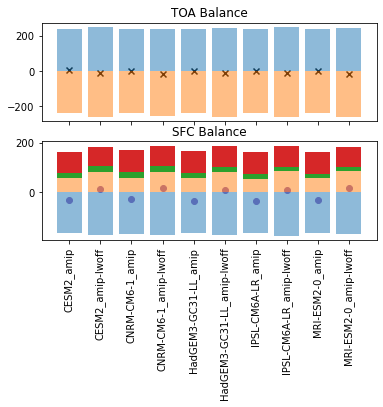

In [64]:

fig, ax = plt.subplots(nrows=2, sharex=True)
ax[0].bar(np.arange(1, len(toa_sw)+1), toa_sw.values(), alpha=0.5)
ax[0].bar(np.arange(1, len(toa_lw)+1), -np.array(list(toa_lw.values())), alpha=0.5)
ax[0].scatter(np.arange(1, len(toa_lw)+1), np.array(list(toa_sw.values()))-np.array(list(toa_lw.values())), marker='x', color='black')

ax[1].bar(np.arange(1, len(sfc_sw)+1), sfc_sw.values(), alpha=0.5)
ax[1].bar(np.arange(1, len(sfc_lw)+1), sfc_lw.values(), alpha=0.5)
ax[1].bar(np.arange(1, len(sfc_lw)+1), sfc_sh.values(), bottom=list(sfc_lw.values()))
ax[1].bar(np.arange(1, len(sfc_lw)+1), sfc_lh.values(), bottom=np.array(list(sfc_lw.values()))+np.array(list(sfc_sh.values())))
ax[1].scatter(np.arange(1, len(sfc_lw)+1), np.array(list(sfc_sw.values())) + np.array(list(sfc_lw.values()))+np.array(list(sfc_lw.values()))+np.array(list(sfc_sh.values())))

ax[1].set_xticks(np.arange(1, len(sfc_sw)+1))
ax[1].set_xticklabels(sfc_sw.keys(), rotation=90)

ax[0].set_title("TOA Balance")
ax[1].set_title("SFC Balance")

Text(0.5, 1.0, 'LW_sfc, global & time average')

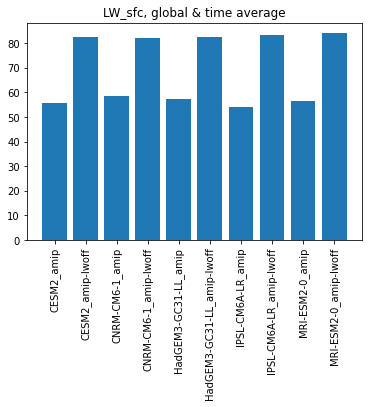

In [68]:
# visualize the δRsfc
fig, ax = plt.subplots()
ax.bar(np.arange(len(sfc_lw)), np.array(list(sfc_lw.values())))
ax.set_xticks(np.arange(len(sfc_lw)))
ax.set_xticklabels(sfc_lw.keys(), rotation=90)
ax.set_title("LW_sfc, global & time average")
# fig.savefig("/Users/brianpm/Dropbox/Projects/extremes/cmip_lwoff_OLRcorrect_bars.pdf", bbox_inches='tight')

In [101]:
print([(i, glb[i].values.item()) for i in glb])

[('rsdt', 340.35496689055265), ('rsut', 91.19573888473442), ('rlut', 235.43461851563595), ('rsds', 200.56782329133765), ('rsus', 26.108805379914813), ('rlds', 334.21612020749205), ('rlus', 393.8249469077779), ('hfss', 21.097049177031543), ('hfls', 79.74416502699901), ('pr', 3.1894594603906825e-05)]


In [86]:
glb['pr'].values.item()*2.501e6

79.76838110437097

In [54]:
toa_sw.values()

dict_values([241.63964891654496, 249.15922800581822, 238.68703648594055, 241.36339705599215, 240.16539001464844, 249.72018432617188, 241.13717530852193, 246.22788484223662])

In [149]:
cc = xr.open_dataset(dloc / 'pr_Amon_CESM2_amip_r1i1p1f1_gn_195001-201412.nc')

/Users/brianpm/miniconda3/envs/py38/lib/python3.8/site-packages/xarray/conventions.py:492: SerializationWarning: variable 'pr' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [150]:
cc['pr'].max()

<xarray.DataArray 'pr' ()>
array(1.1694978e-08, dtype=float32)
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        at surface; includes both liquid and solid phases from al...
    description:    at surface; includes both liquid and solid phases from al...
    frequency:      mon
    id:             pr
    long_name:      Precipitation
    mipTable:       Amon
    out_name:       pr
    prov:           Amon ((isd.003))
    realm:          atmos
    standard_name:  precipitation_flux
    time:           time
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Precipitation
    type:           real
    units:          kg m-2 s-1
    variable_id:    pr

In [69]:
-12.6 + 23.8 + 2.2

13.400000000000002